# Test Identifier

In [1]:
import tensorflow as tf
from tensorflow.data import AUTOTUNE
import numpy as np
import os
import re
import string
import csv
import matplotlib.pyplot as plt
from imutils import paths
from PIL import Image

In [2]:
modelPath = './Models/Classifier/5'
if os.path.isdir(modelPath) is False: 
    print('Model not found!!!')

In [3]:
CSVPath = './pokemon.csv'
uniqueDexNames = []
uniqueDexIDs = []

with open(CSVPath, encoding="utf8") as file: 
    csv_reader = csv.reader(file, delimiter=',')

    firstLine = True
    for line in csv_reader:
        if firstLine is not True: 
            tempID = int(line[32])
            if tempID not in uniqueDexIDs:
                #remove trailing . keep from creating directories with trailing .
                cleanName = re.sub("[.]", '', line[30])
                uniqueDexIDs.append(tempID)
                uniqueDexNames.append(cleanName)
        else: 
            #figure out what columns in the dataset contain the pokemon name and pokedexID -- TODO 
            firstLine = False

#sort names into alphabetical order 
uniqueDexNames.sort()

In [4]:
model = tf.keras.models.load_model(modelPath)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 128)        0

In [5]:
seqAugment = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(scale=1.0/255),  
])

In [6]:
def loadImages(imagePath):
    #encode the image
    # tf.print(imagePath)
    image = tf.io.read_file(imagePath)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize_with_pad(image, 80, 80)
    image = tf.cast(image, tf.float32)
    return (image)

In [7]:
# testPath = list(paths.list_images('./TestImages'))

# print(testPath)

# # norm = tf.keras.layers.Normalization(1./255)

# testDS = tf.data.Dataset.from_tensor_slices(testPath)
# testDS = (testDS
#     .map(loadImages, num_parallel_calls=AUTOTUNE)
#     .batch(1)
# )
# # testDS = 

# for image in testDS.take(1):
#     newPred = model.predict(image)
#     print(np.argmax(newPred), 100 * np.max(newPred))

./TestImages/001-bulbasaur.gif
82
801


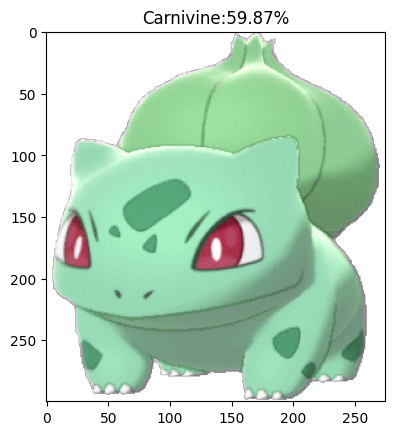

./TestImages/003-venusaur-f-0.png
184
801


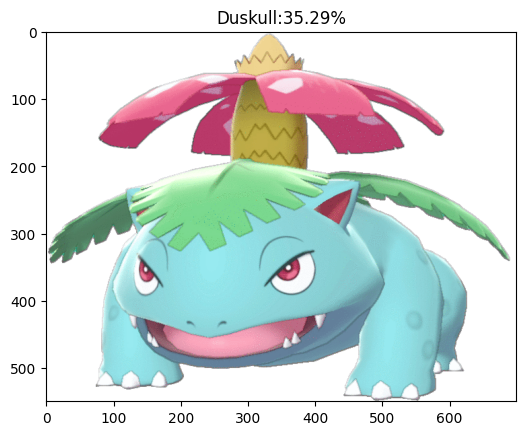

./TestImages/004-charmander.gif
817
801
./TestImages/009-blastoise.gif
63
801


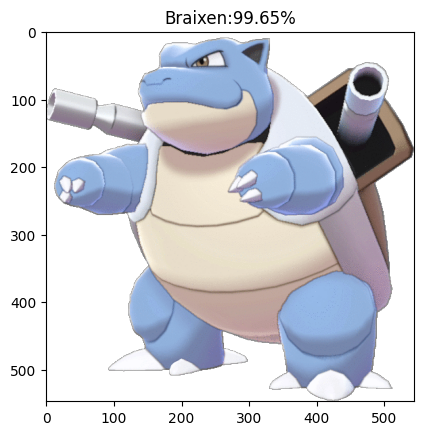

./TestImages/ani--abomasnow-0.png
0
801


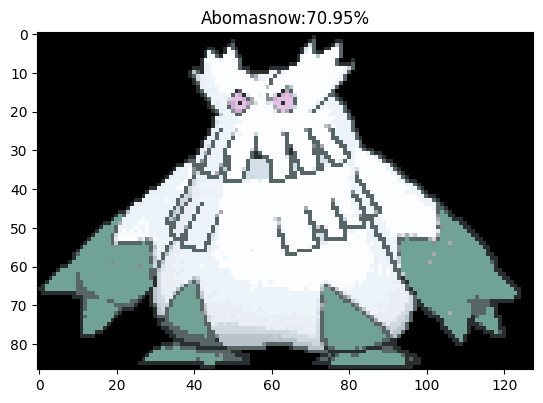

./TestImages/ani--arcanine-0.png
524
801


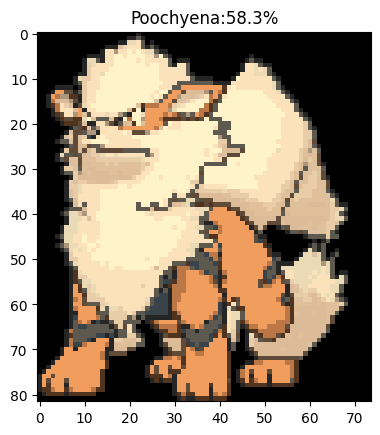

./TestImages/ani--axew-0.png
36
801


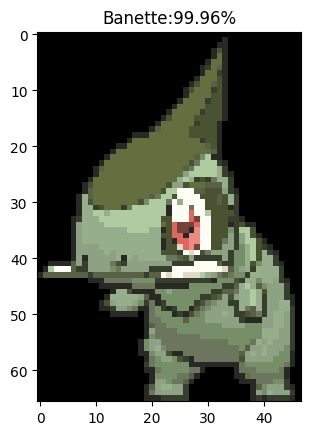

./TestImages/ani--palkia-6.png
543
801


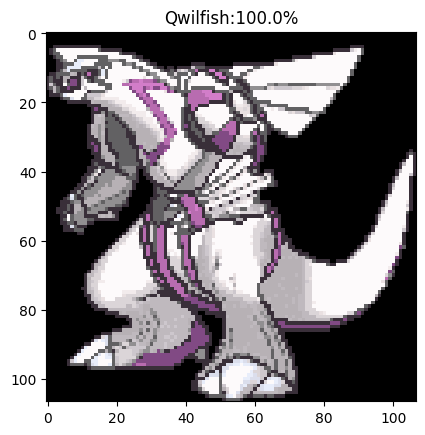

./TestImages/Screenshot 2022-04-28 010028.png
86
801


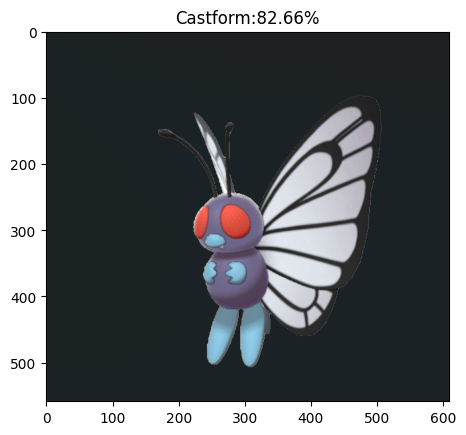

./TestImages/Screenshot 2022-04-28 012213.png
570
801


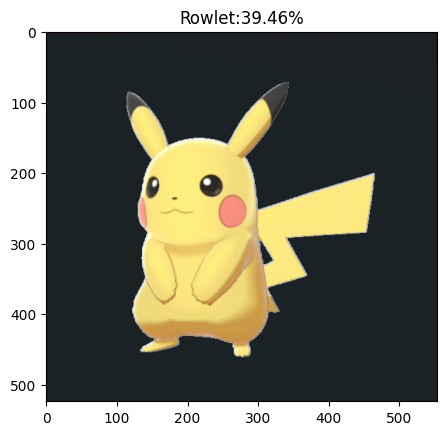

./TestImages/Screenshot 2022-04-28 012225.png
540
801


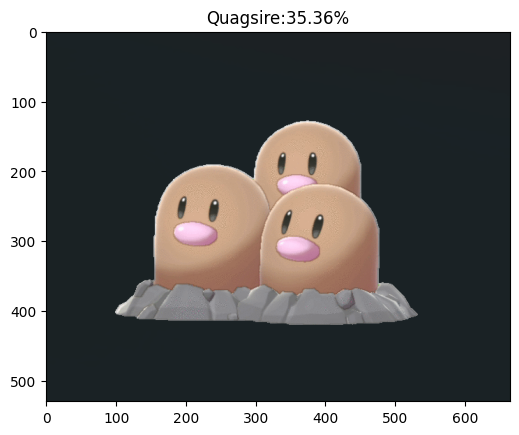

In [8]:
drawCounter = 0 
test_dir = './TestImages/'


imagePaths = os.listdir(test_dir)
for imgFile in imagePaths:
    fullImagePath = os.path.join(test_dir, imgFile)
    print(fullImagePath)
    img = tf.keras.utils.load_img(
        fullImagePath, 
        color_mode='rgb', 
        target_size=(80, 80)
    )

    #run prediction 
    img_array = tf.keras.utils.img_to_array(img)
    img_array /= 255.
    img_array = tf.expand_dims(img_array, 0) #create a batch

    predictions = model.predict(img_array)
    predicted_value = np.argmax(predictions)
    print(predicted_value)
    print(len(uniqueDexNames))
    if predicted_value < len(uniqueDexNames):
        predicted_name = uniqueDexNames[predicted_value]

        img = Image.open(fullImagePath)
        plt.imshow(img)
        plt.title(f"{predicted_name}:{round(100 *  np.max(predictions), 2)}%")
        plt.show()

    # if drawCounter == 8:
    #     plt.show()
    drawCounter += 1
